## Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Found 3337 images belonging to 3 classes.
Found 833 images belonging to 3 classes.
Found 1046 images belonging to 3 classes.
Epoch 1/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.5015 - loss: 1.0441 - val_accuracy: 0.6351 - val_loss: 0.7960
Epoch 2/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.6403 - loss: 0.8099 - val_accuracy: 0.6567 - val_loss: 0.7390
Epoch 3/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.6847 - loss: 0.7238 - val_accuracy: 0.6795 - val_loss: 0.7075
Epoch 4/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.7054 - loss: 0.7038 - val_accuracy: 0.7167 - val_loss: 0.6475
Epoch 5/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.7242 - loss: 0.6516 - val_accuracy: 0.7443 - val_loss: 0.6368
Epoch 6/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.7213 - loss: 0.6288 - val_accuracy: 0.7047 - val_loss: 0.7283
Epoch 7/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.7257 - loss: 0.6474 - val_accuracy

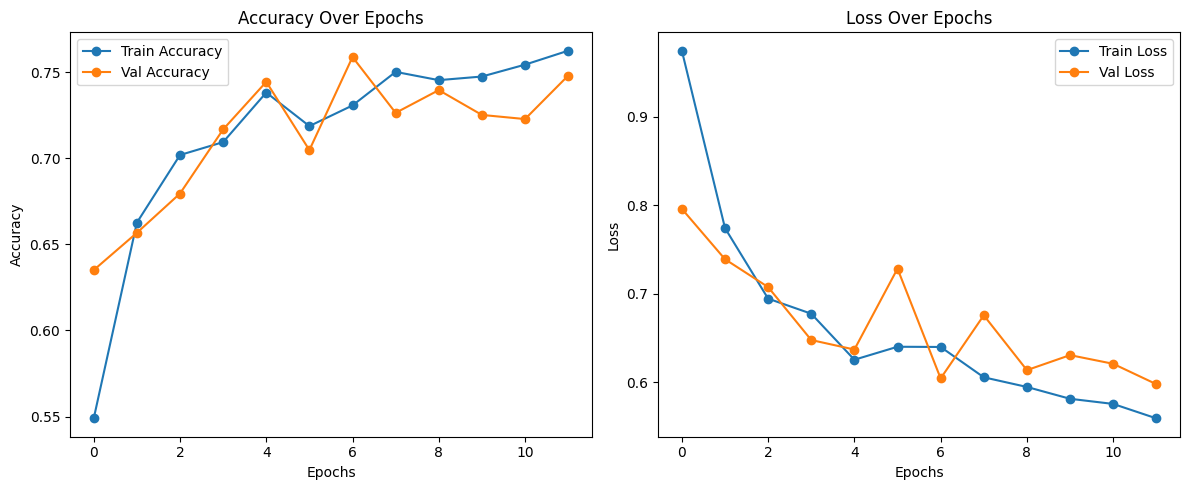

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# define Paths
data_dir = "/content/drive/MyDrive/Ai engineer/CNN/project/xraychest"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# image Settings
IMG_SIZE = (96, 96)
BATCH_SIZE = 32

# data Generators to train on different angle of images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_accuracy", mode="max")
early_stop = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25,
    callbacks=[checkpoint, early_stop]
)

# Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n✅ Final Test Accuracy: {test_acc:.2f}")
print(f"❌ Final Test Loss: {test_loss:.2f}")

# Visualization
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Found 3337 images belonging to 3 classes.
Found 833 images belonging to 3 classes.
Found 1046 images belonging to 3 classes.
Epoch 1/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.4825 - loss: 1.1267 - val_accuracy: 0.5186 - val_loss: 0.9569
Epoch 2/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.6095 - loss: 0.8831 - val_accuracy: 0.6567 - val_loss: 0.7866
Epoch 3/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.6620 - loss: 0.7780 - val_accuracy: 0.6387 - val_loss: 0.7764
Epoch 4/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.6686 - loss: 0.7402 - val_accuracy: 0.7083 - val_loss: 0.6717
Epoch 5/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.6971 - loss: 0.6866 - val_accuracy: 0.6915 - val_loss: 0.7149
Epoch 6/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.7076 - loss: 0.6699 - val_accuracy: 0.6663 - val_loss: 0.7230
Epoch 7/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7007 - loss: 0.6531 - val_accuracy

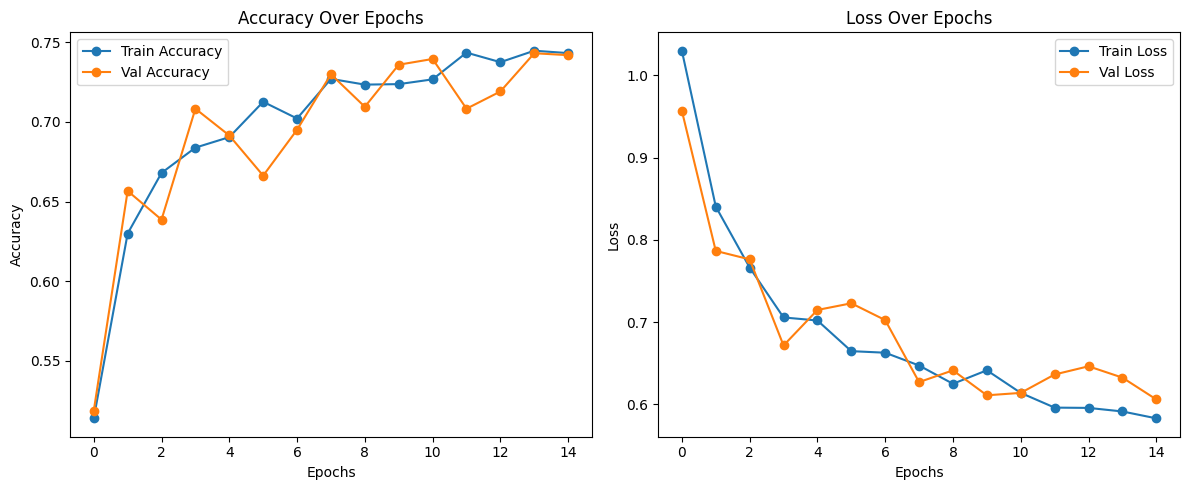

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

data_dir = "/content/drive/MyDrive/Ai engineer/CNN/project/xraychest"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

IMG_SIZE = (96, 96)
BATCH_SIZE = 32

# data Generators to train on different angle of images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# CNN Model
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the Model
checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_accuracy", mode="max")
early_stop = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[checkpoint, early_stop]
)

# Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_gen)
print(f"\nFinal Test Accuracy: {test_acc:.2f}")
print(f"Final Test Loss: {test_loss:.2f}")

# Visualization
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Found 3337 images belonging to 3 classes.
Found 833 images belonging to 3 classes.
Found 1046 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.4610 - loss: 1.0977 - val_accuracy: 0.6206 - val_loss: 0.8988
Epoch 2/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.5404 - loss: 0.9542 - val_accuracy: 0.6471 - val_loss: 0.7495
Epoch 3/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.6750 - loss: 0.7258 - val_accuracy: 0.6279 - val_loss: 0.8043
Epoch 4/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6909 - loss: 0.7264 - val_accuracy: 0.6783 - val_loss: 0.7084
Epoch 5/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.6974 - loss: 0.6818 - val_accuracy: 0.7095 - val_loss: 0.6822
Epoch 6/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.7313 - loss: 0.6426 - val_accuracy: 0.6927 - val_loss: 0.6726
Epoch 7/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.7227 - loss: 0.6490 - val_accuracy: 0.7179 - val_loss: 0.6648
Epoch 8/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.7445 - loss: 0.6126 - val_accu


Final Test Accuracy: 0.79
Final Test Loss: 0.53
model saved to drive


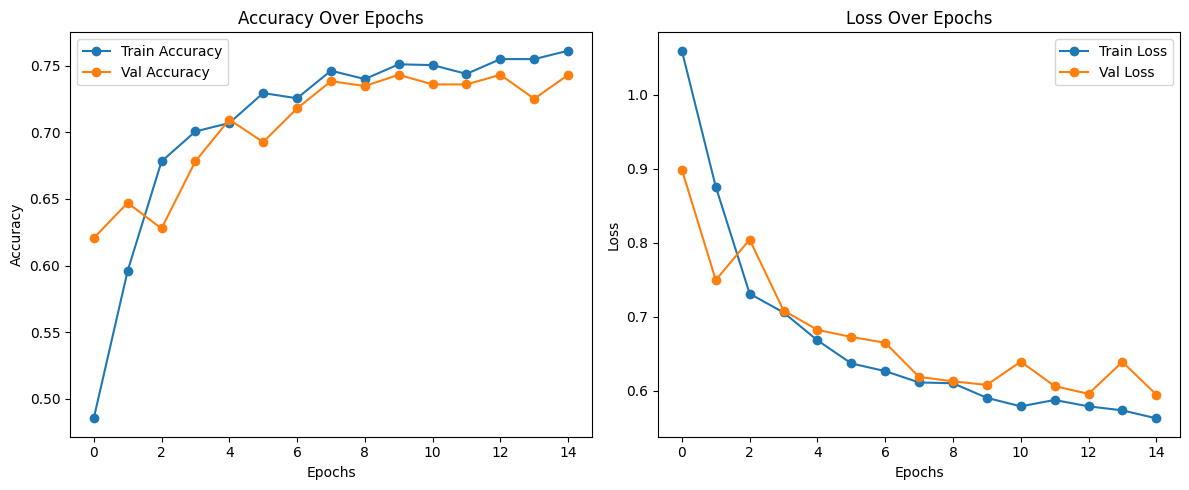

In [ ]:
# Step 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Step 2: Define Paths
data_dir = "/content/drive/MyDrive/Ai engineer/CNN/project/xraychest"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Step 3: Image Settings
IMG_SIZE = (96, 96)
BATCH_SIZE = 32

# Step 4: Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Step 5: Define CNN Model
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_accuracy", mode="max")
early_stop = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25,
    callbacks=[checkpoint, early_stop]
)

# Step 7: Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_gen)
print(f"\nFinal Test Accuracy: {test_acc:.2f}")
print(f"Final Test Loss: {test_loss:.2f}")

model.save('/content/drive/MyDrive/xraychest.h5')
print("model saved to drive")
# Step 8: Visualization
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
